## Dimensionality Reduction

### Data Matrix: 
- Load + Preprocess-operations
- Face-Dataset: 
  - http://vis-www.cs.umass.edu/lfw/
  - Download: http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
- Download + Unzip + Upload to Drive to be used with Colab.


**lfw_funneled**:
- Download + Unzip
- "ls" to list folders
- some folders like George_W_Bush have more iamges and others have too few.
- http://vis-www.cs.umass.edu/lfw/#information
  - 13233 images
  - 5749 people
  - 1680 people with two or more images
- Idea: Let us only retain a few folders which have atleast 100 images per person/folder.
- Code on your laptop to remove folders with <100 images
- Upload foldes with >= 100 images to GDrive to save bandwidth


In [10]:
# DONOT RUN this cell 
# RUN IT ON YOUR COMPUTER to remove folder with < 100 images
import os
import shutil


directory = os.path.join(os.getcwd(), 'lfw_funneled')

#Google "For each file in a directory Python" ---> https://www.newbedev.com/python/howto/how-to-iterate-over-files-in-a-given-directory/

for subfolder in os.listdir(directory):
    path = os.path.join(directory, subfolder)
    if os.path.isdir(path): #Google "IS direcotry or file Python" ----> https://pythonexamples.org/python-check-if-path-is-file-or-directory/
        # print(subfolder)
        # Google "number of files in a folder python " ----->https://stackoverflow.com/questions/2632205/how-to-count-the-number-of-files-in-a-directory-using-python
        l = len(os.listdir(path))
        if l < 100:
            # Google: " Deletedirectory Python" --->https://linuxize.com/post/python-delete-files-and-directories/#deleting-directories-folders(directory+subfolder)
            shutil.rmtree(path)
        else:
            print(subfolder + str(l))

Colin_Powell236
Donald_Rumsfeld121
George_W_Bush530
Gerhard_Schroeder109
Tony_Blair144


In [12]:
# 1.3 Python code to list files and folders
# Same code snippets/functions as in code executed on your computer above.

import os
directory = os.path.join(os.getcwd(), 'lfw_funneled')
cnt = 0

for subfolder in os.listdir(directory):
  p = os.path.join(directory, subfolder)
  
  if os.path.isdir(p):
    for f in os.listdir(p):
      if f.endswith(".jpg"):
        fname = os.path.join(p, f)
        #print(fname)
        cnt += 1
print(cnt)

1140


<class 'numpy.ndarray'>
(250, 250)


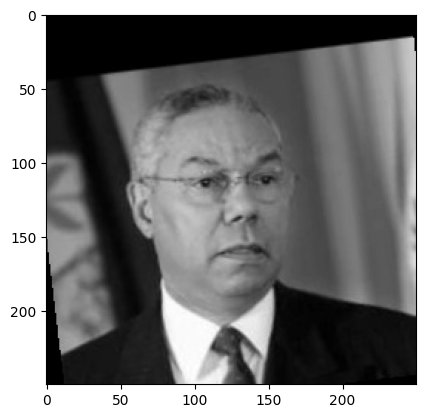

(1, 62500)


In [13]:
#1.4 Load one image & reshape into a vector

# Google "read image in opencv python " ---> https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
import cv2 # opencv-python
import numpy as np


# load the image
# Load an color image in grayscale
# Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
im = cv2.imread('lfw_funneled\Colin_Powell\Colin_Powell_0001.jpg',0)

print(type(im))
print(im.shape)

# show the image using MatPlotLib (seen earlier)
import matplotlib.pyplot as plt

plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

# reshape im to a vector
d = 62500 # dim of each image
imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
print(imVec.shape) 


In [14]:
# Make a function out of it
def loadImage(fileName):
  # load the image
  # Load an color image in grayscale
  # Refer:https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html?highlight=imread#imread
  im = cv2.imread(fileName,0)

  # reshape im to a vector
  d = 62500 # dim of each image
  imVec = np.reshape(im,(1,d)) # row-vector 1 X 62500
  return imVec


In [15]:
# 1.5 Build a Data-Matrix with each row as an image
n = 1140
d = 62500

data = np.zeros((n,d))

index_file = dict(); # store mapping from row-index to filename

labels = [] # one unique number for all images in  each folder 

# Reusing the code above to ietarte through each folder and image
directory = os.path.join(os.getcwd(), 'lfw_funneled')

i = 0
folderNum = -1

for subfolder in os.listdir(directory): # for each folder
  p = os.path.join(directory, subfolder)
  
  if os.path.isdir(p): # check for subfolders
    folderNum += 1

    for f in os.listdir(p):
      
      if f.endswith(".jpg"): # check for image files
        fname = os.path.join(p, f)
        
        data[i,:] = loadImage(fname) 
        index_file[i] = fname
        labels.append(folderNum)
        
        i += 1


print(i)
#print(index_file)
print(labels)
# takes time as it has to load each iamge from disk and put it into memory


1140
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

(1140, 62500)
234.0
0.0
108.35616


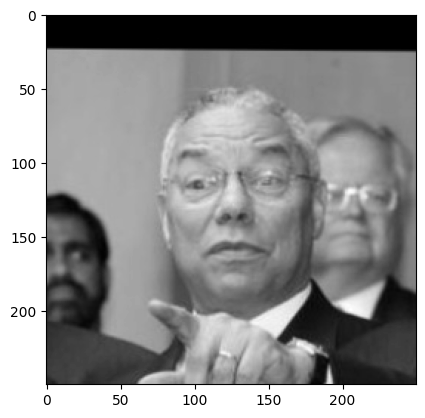

In [17]:
print(data.shape)

# 1.6 sanity checks
print(np.max(data[10,:]))
print(np.min(data[10,:]))
print(np.mean(data[10,:]))

# thorough sanity checks to mkse sure everything is alright
tmp = data[10,:].reshape((250,250))

plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

#print(index_file[10])


In [19]:
# Let us store the data and index_file to drive so that we can load them directly
# Pickle Files

import pickle
# Google "read and write pickle files" ---> https://wiki.python.org/moin/UsingPickle

fName = directory + "data.pkl"
pickle.dump( data, open( fName, "wb" ) )

fName = directory + "index_file.pkl"
pickle.dump( index_file, open( fName, "wb" ) )

# See in the folders

# read pkl file back
index_file_pkl = pickle.load( open( fName, "rb" ) )
#print(index_file_pkl)
#print(index_file)


# Unmounting: https://colab.research.google.com/notebooks/io.ipynb
# drive.flush_and_unmount()

### Scikit-Learn: PCA
- Key ingredients: Google + References + Basics of Python + Experiment + lots-of-patience + Check all inputs and outputs
-  User-Guides: https://scikit-learn.org/stable/user_guide.html
- API: https://scikit-learn.org/stable/modules/classes.html
- Every library has a unique way of performing its operations. You just have to get used to it.

- Google "SKlearn PCA" ---> https://scikit-learn.org/stable/modules/classes.html

- Indepth reading: https://scikit-learn.org/stable/modules/classes.html + examples on the page



(1140, 62500)


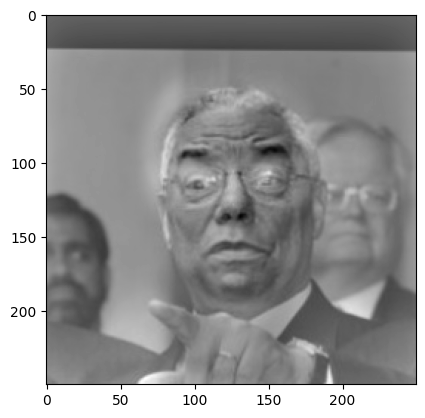

In [20]:
# data-preprocess: mean centering +  variance scaling for each featrue
# Wiki for PCA: "PCA can be done by eigenvalue decomposition of a data covariance (or correlation) 
# matrix or singular value decomposition of a data matrix, usually after a normalization 
# step of the initial data. The normalization of each attribute consists of mean centering – 
# subtracting each data value from its variable's measured mean so that its empirical mean (average) is zero.
# Some fields, in addition to normalizing the mean, do so for each variable's variance (to make it equal to 1)"

from sklearn import preprocessing
data_scaled = preprocessing.scale(data)
print(data_scaled.shape)

# viz a standarized image
tmp = data_scaled[10,:].reshape((250,250))
plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

In [21]:
from sklearn.decomposition import PCA
import time
pca = PCA(n_components = 50)

start_time = time.time()
pca.fit(data_scaled)
end_time = time.time()

print(end_time-start_time)

print(pca)

8.135603904724121
PCA(n_components=50)


[0.21713431 0.05384902 0.04816181 0.04572267 0.03917343 0.03871815
 0.03189486 0.02045846 0.01826238 0.0180453  0.01678775 0.01428113
 0.01254732 0.01148397 0.01129665 0.00994886 0.00977472 0.00889636
 0.00817784 0.00761779 0.00730427 0.00676213 0.00647152 0.00614104
 0.00595264 0.00523409 0.0050723  0.00473982 0.00452975 0.00441783
 0.00434671 0.00418261 0.00398501 0.0037294  0.00364058 0.00355405
 0.00344762 0.00334411 0.00325445 0.00310671 0.00299259 0.00287185
 0.00278515 0.00270646 0.00265002 0.00255653 0.00253558 0.00248128
 0.00242764 0.00238809]


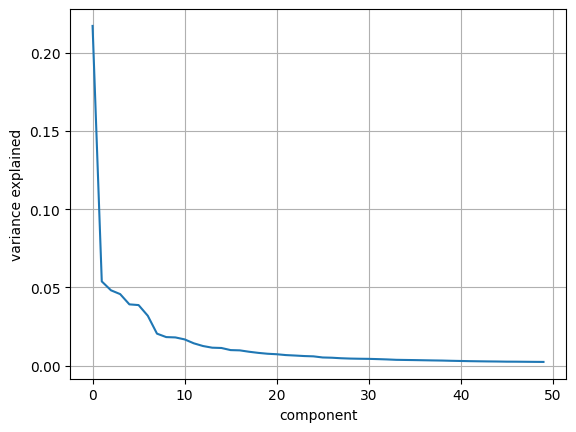

In [22]:
print(pca.explained_variance_ratio_) 

plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('component')
plt.ylabel('variance explained')
plt.show()


(50, 62500)


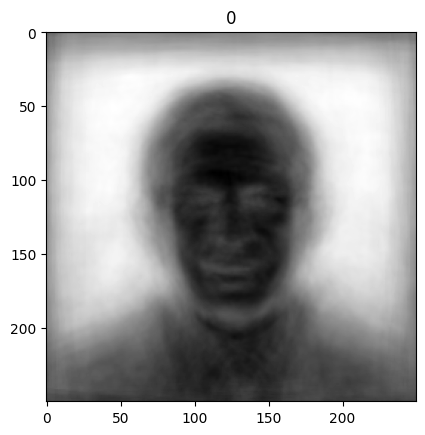

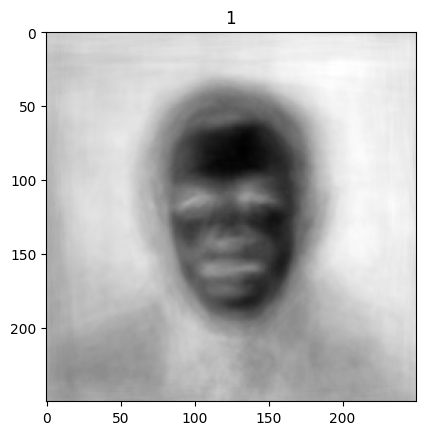

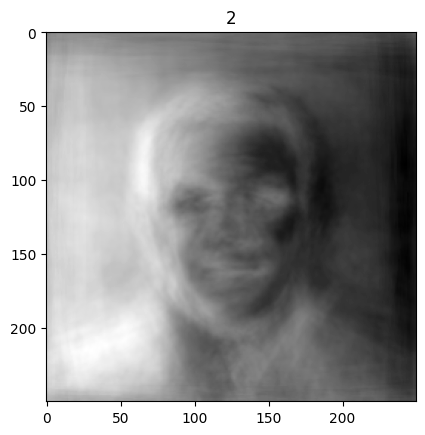

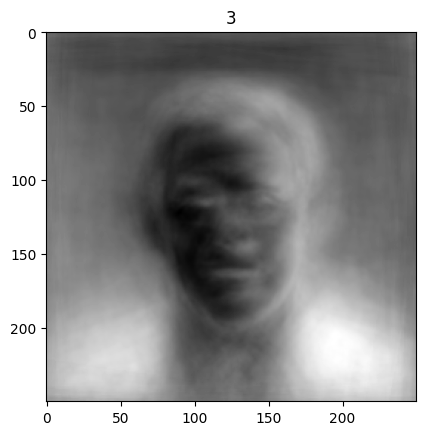

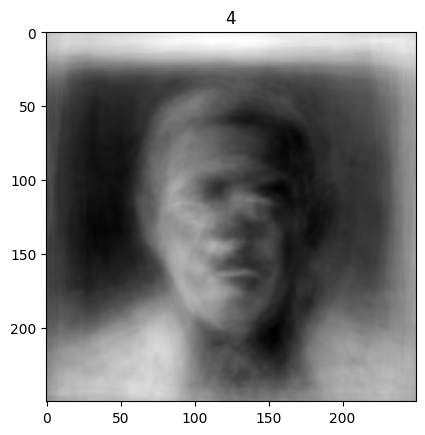

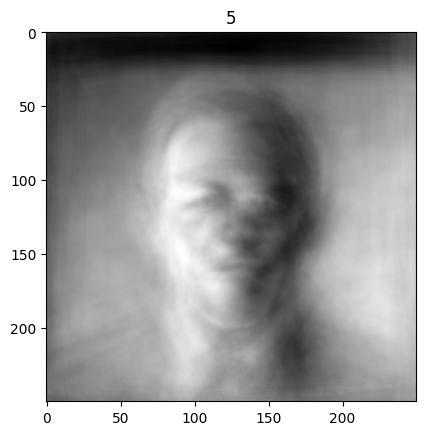

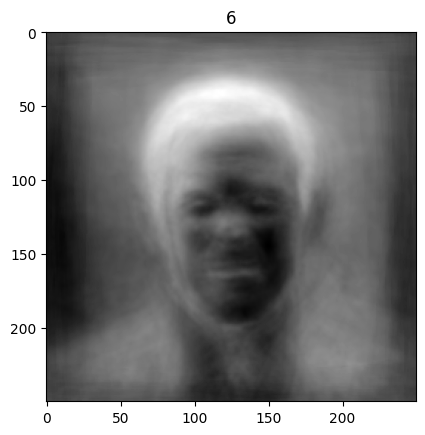

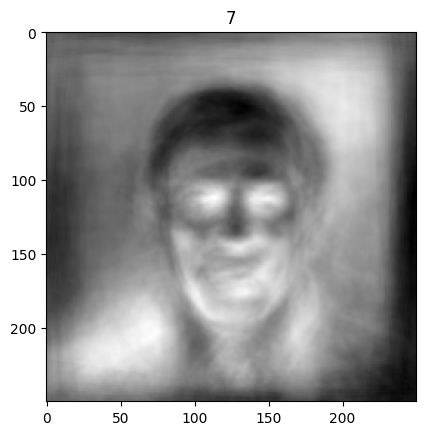

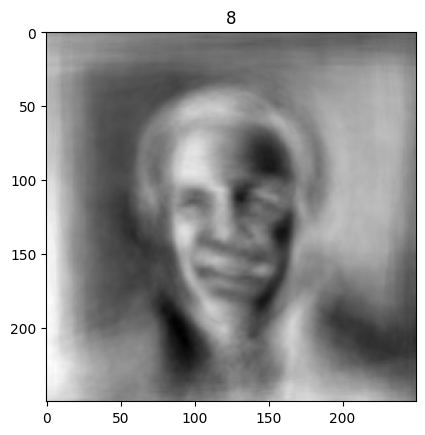

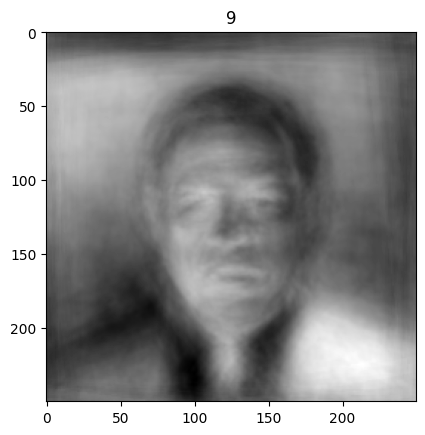

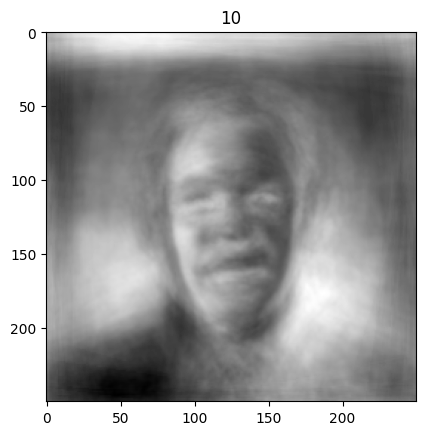

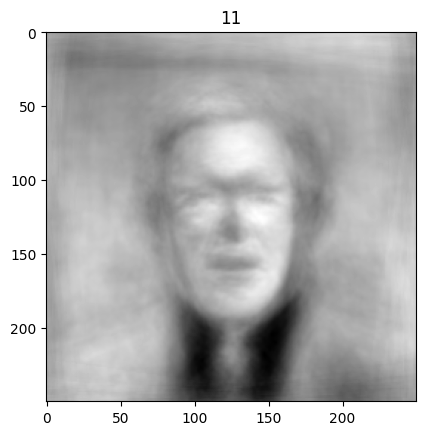

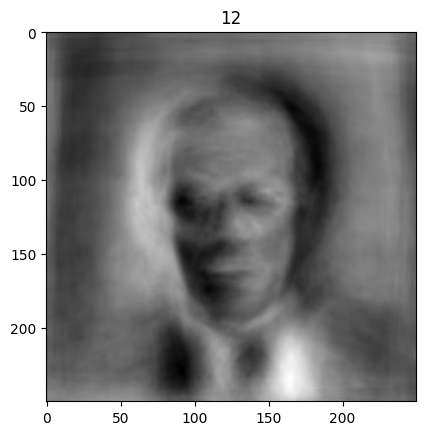

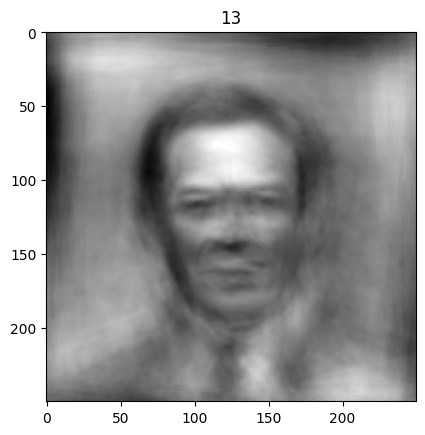

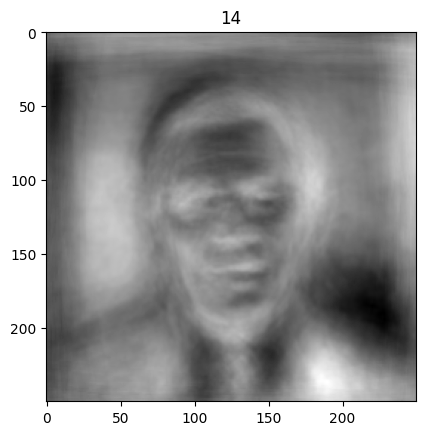

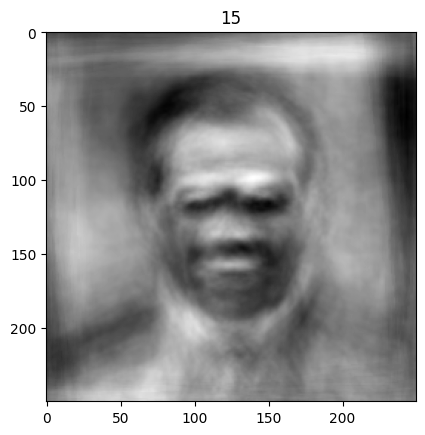

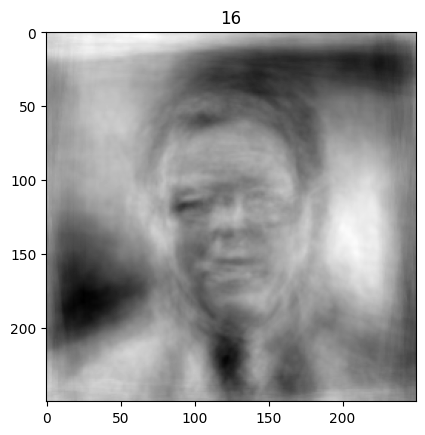

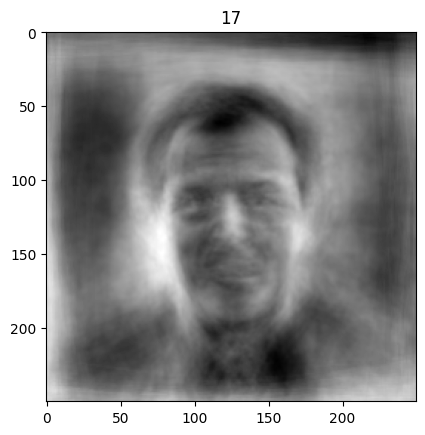

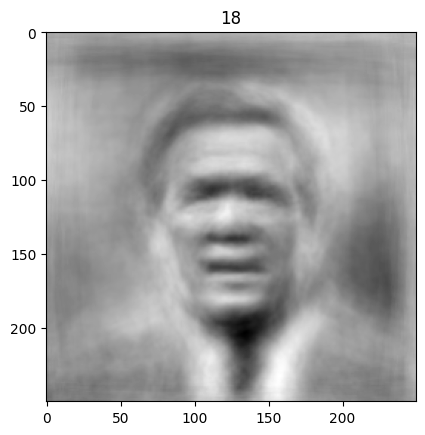

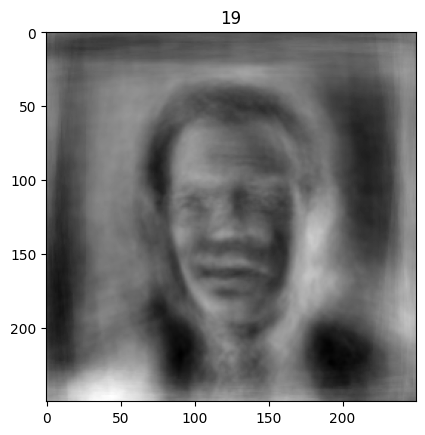

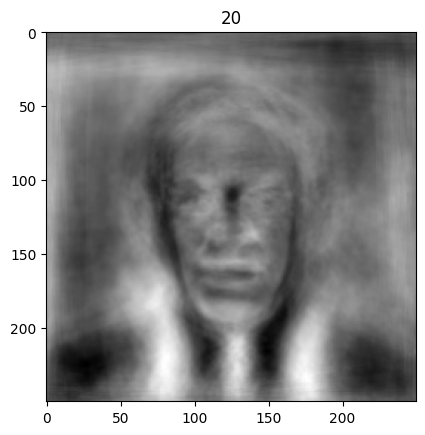

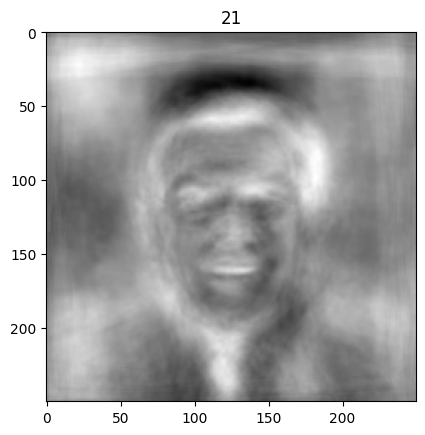

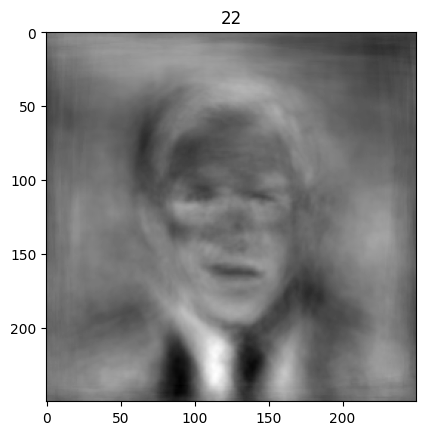

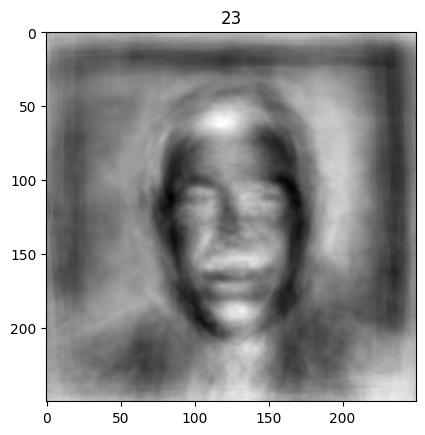

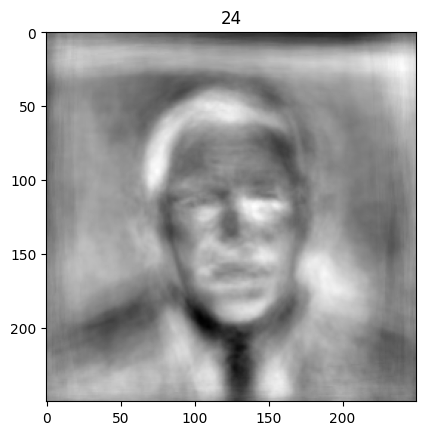

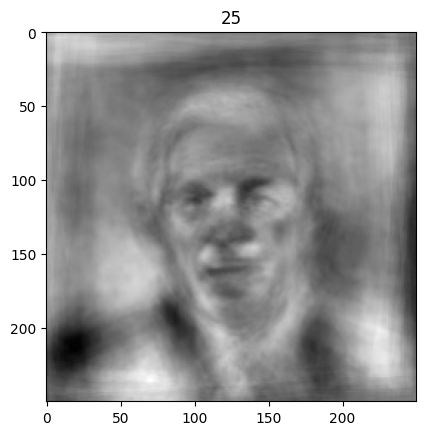

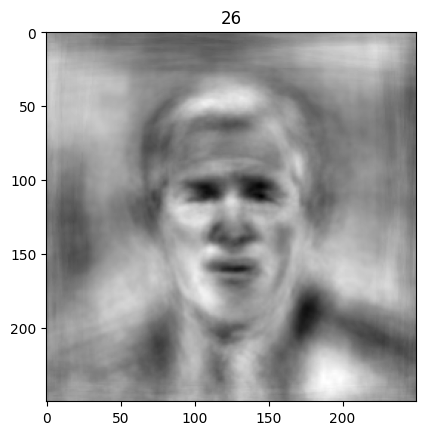

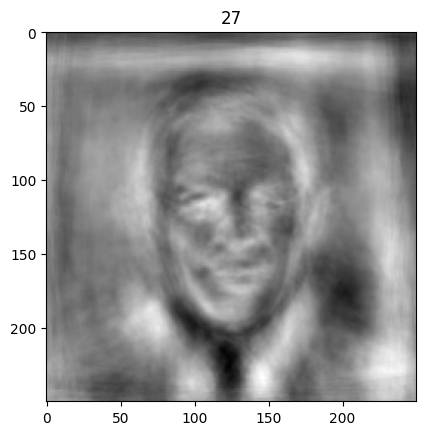

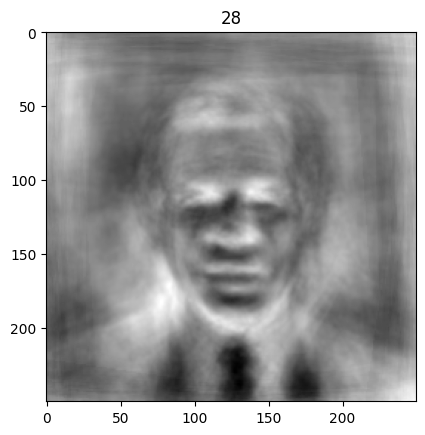

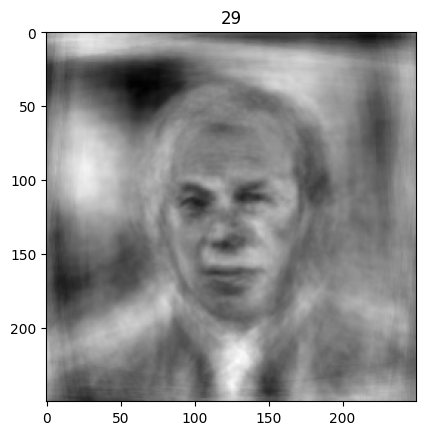

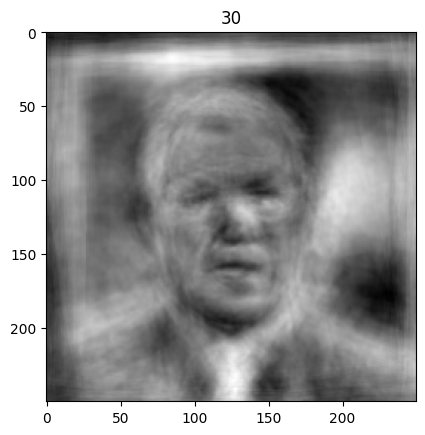

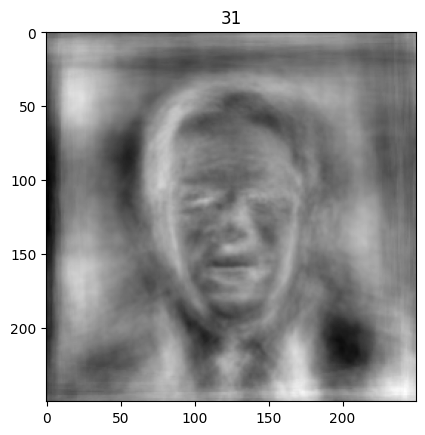

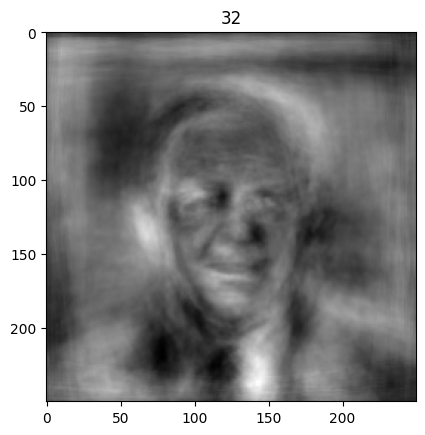

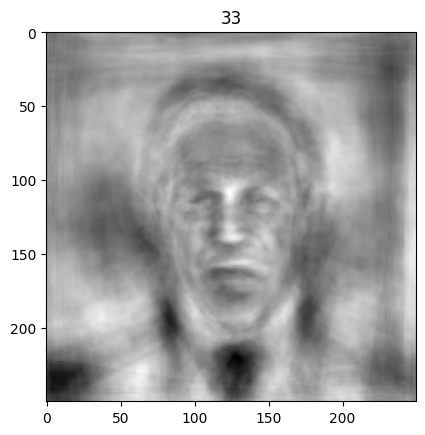

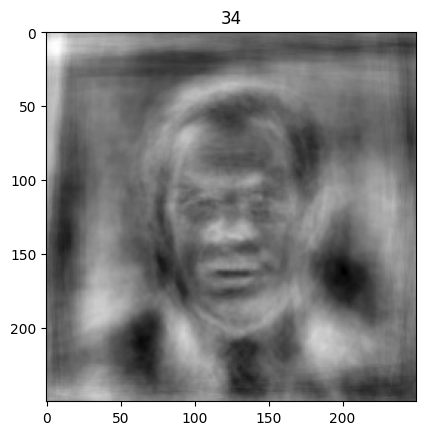

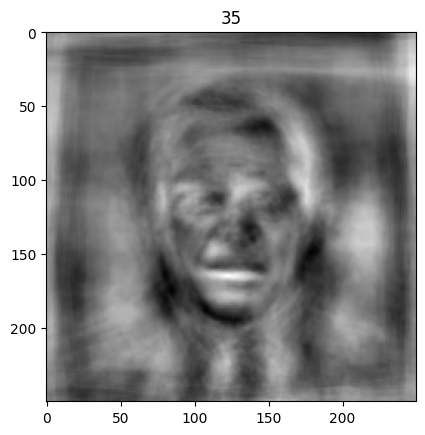

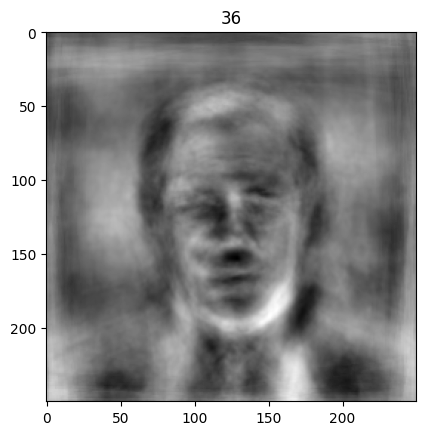

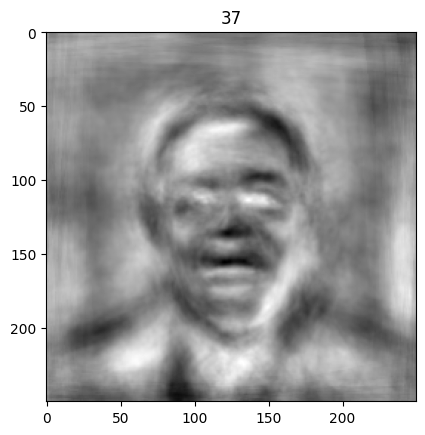

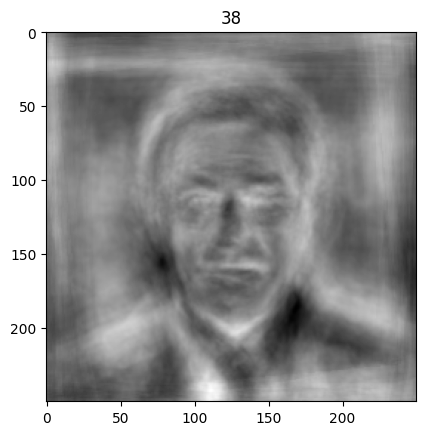

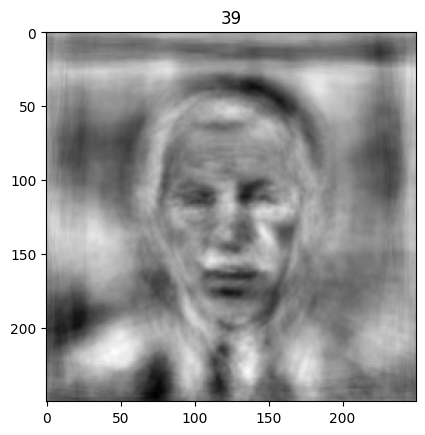

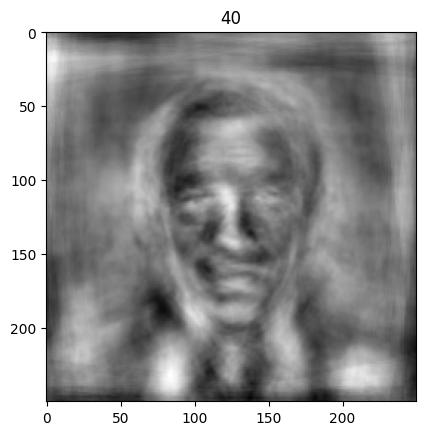

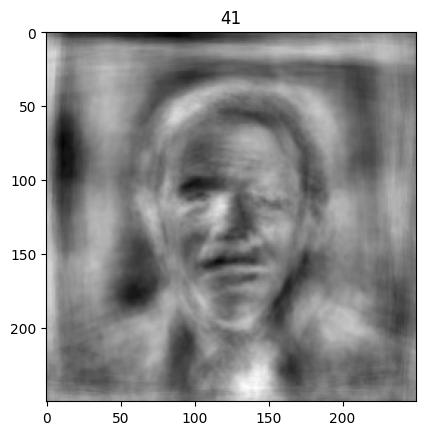

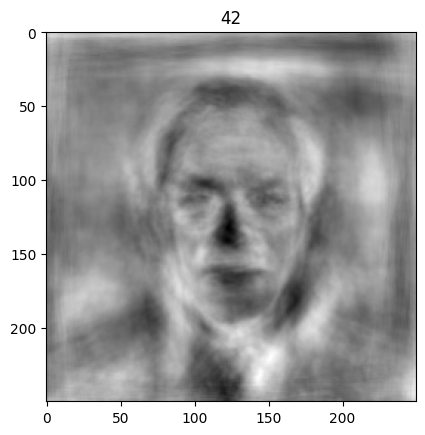

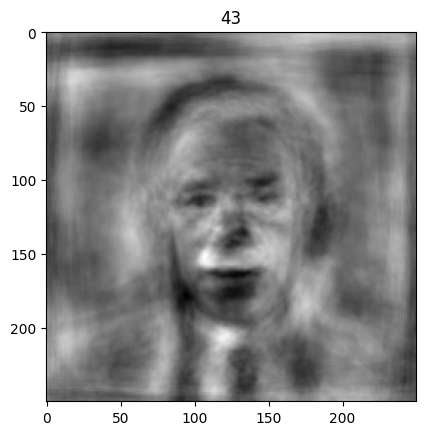

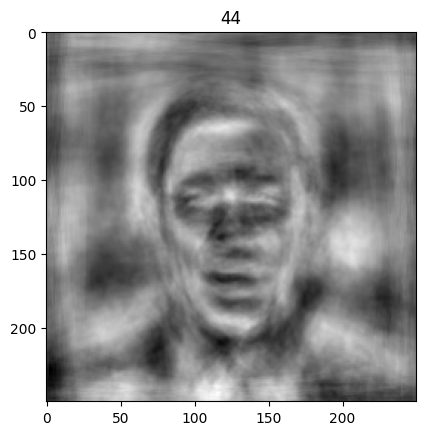

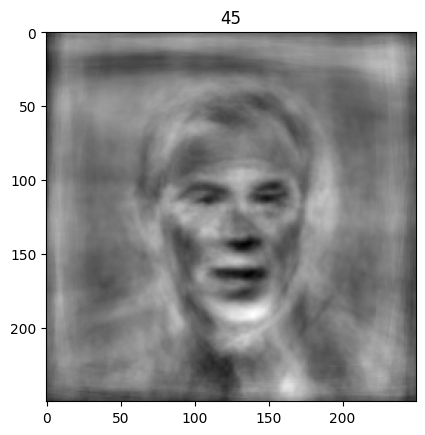

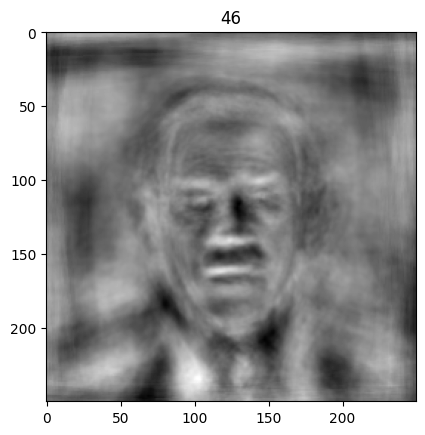

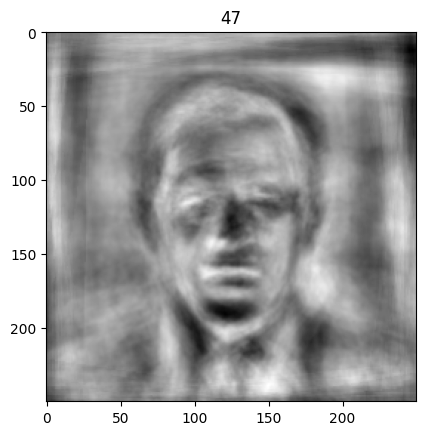

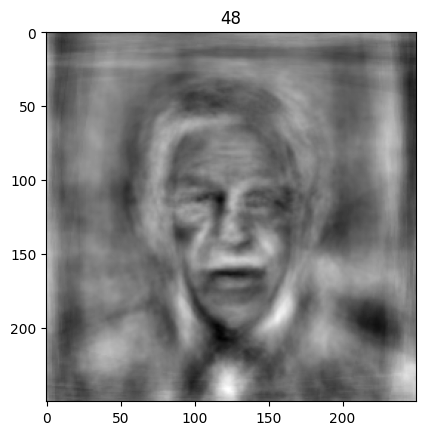

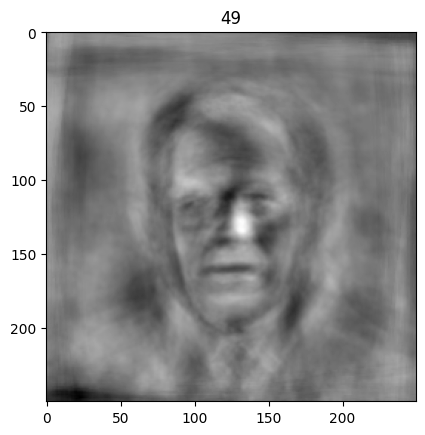

In [26]:
# visualize the images corresponding to the top eigenvectors
print(pca.components_.shape)
plt.rcParams.update({'figure.max_open_warning': 0})

# Google "Subplots in Matplotlib" ---> https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

for i in range(pca.components_.shape[0]):

  fig = plt.figure(i)
  
  im = np.reshape(pca.components_[i,:],(250,250))
  plt.imshow(im, cmap=plt.get_cmap('gray'))
  plt.title(str(i))

plt.show()

In [27]:
# project X to the 50 dim space
data_50 = pca.transform(data_scaled)
print(data_50.shape)

(1140, 50)


In [28]:
# 2-dim embeddings
pca = PCA(n_components=2)
print(pca)

data_2 = pca.fit_transform(data_scaled)
print(data_2.shape)

PCA(n_components=2)


(1140, 2)


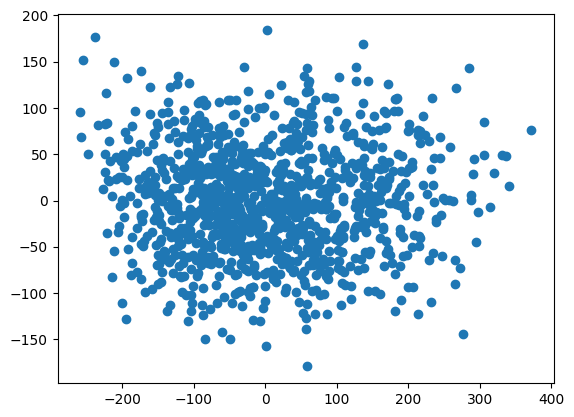

In [29]:

plt.scatter(data_2[:,0],data_2[:,1]) #https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

# can't make much sense of what is happening

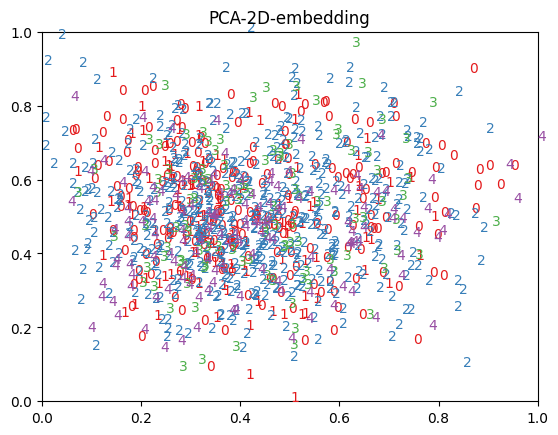

In [30]:
#Plot each 2D point with the correspodning label

# BAsed on https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()

plot_embedding(data_2, labels, "PCA-2D-embedding")

Q. What can we use the PCA output here for?

- Refer: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

### t-SNE
- Can t-SNE based 2D-viz help us here?
- t-SNE actively tries to find a good  embedding 

In [31]:
# Load data from SKLearn datasets
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html#sklearn.datasets.fetch_lfw_people

from sklearn.datasets import fetch_lfw_people
D = fetch_lfw_people(min_faces_per_person=100) 
print(type(D))

# Code example: https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py


<class 'sklearn.utils._bunch.Bunch'>


In [34]:
print((D.data).shape)

(1140, 2914)


In [35]:
n, h, w = D.images.shape
print(n,h,w)

1140 62 47


In [39]:
import warnings
warnings.filterwarnings('ignore')

X = preprocessing.scale(D.data)

In [40]:
print(X.shape)

(1140, 2914)


In [41]:
y = D.target  
print(y.shape)

(1140,)


In [42]:
(unique, counts) = np.unique(y, return_counts=True) # https://kite.com/python/answers/how-to-count-frequency-of-unique-values-in-a-numpy-array-in-python
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[  0 236]
 [  1 121]
 [  2 530]
 [  3 109]
 [  4 144]]


In [43]:
#Example: https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
import time
from sklearn import manifold


tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)


10.21565866470337


In [44]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

8.343677759170532


In [45]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=5)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

8.754278421401978


In [46]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, n_jobs=12)

start_time = time.time()
X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
end_time = time.time()

print(end_time-start_time)

8.301685571670532


In [47]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
# Made  modifications to above code
# Scale and visualize the embedding vectors

def plot_embedding(X, y, title=None):
    # min-max scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),)

    if title is not None:
        plt.title(title)
    plt.show()

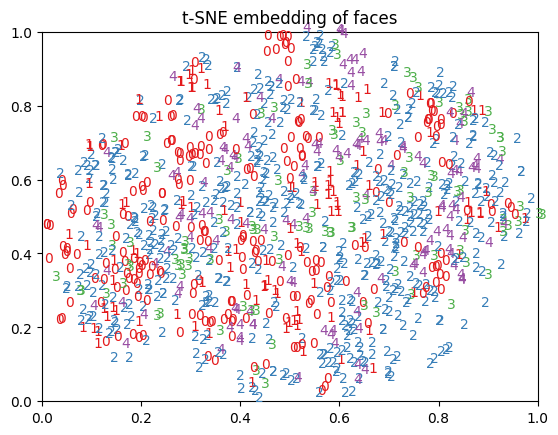

In [48]:
plot_embedding(X_tsne, y, "t-SNE embedding of faces" )

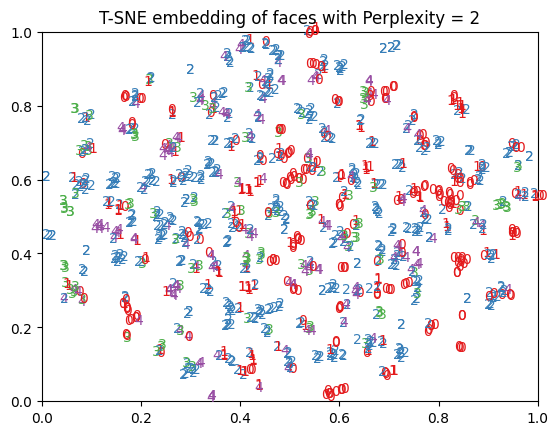

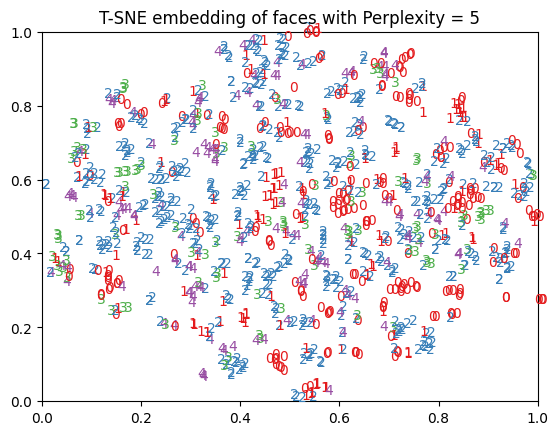

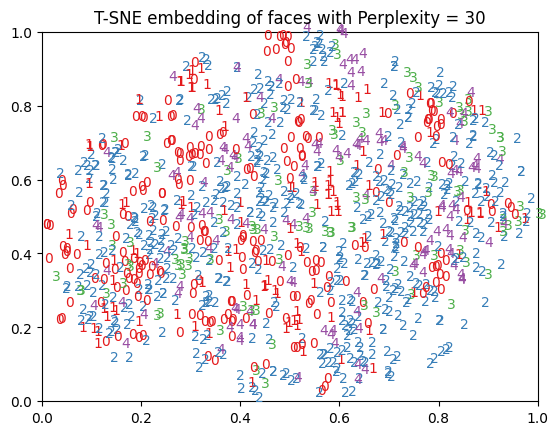

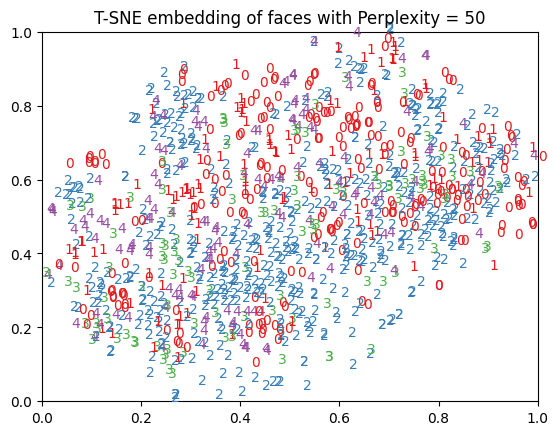

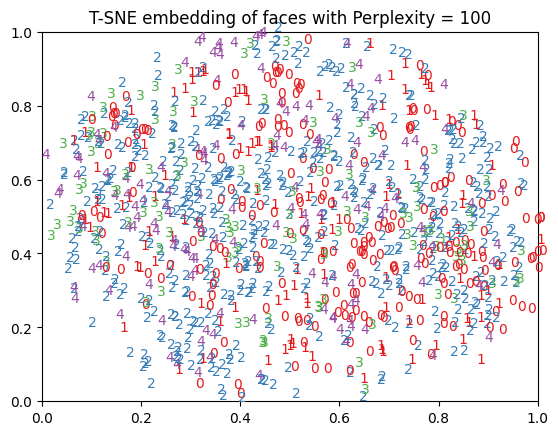

In [50]:
perplexities = [2, 5, 30, 50, 100]

for perp in perplexities:
    tsne = manifold.TSNE(n_components=2, init='pca', perplexity=perp,random_state=0, n_jobs=12)
    X_tsne = tsne.fit_transform(X) # fit and transfrom just like PCA
    plot_embedding(X_tsne, y, f"T-SNE embedding of faces with Perplexity = {perp}" )


**Summary:**
- Decent result. Better than PCA.
- Far from ideal as faces are complex data-points and we humans have evolved to distinguish them over a million years
- We are compeletely ignoring the spatial-properties of images in our system.
- Convolution operations used in CNN solve this.
- We can improve this: DeepLearning based Conv-Autoencoders, Siamese networks, FaceNet etc.